Решение задачи Spotify
Импортируем все библиотеки, которые могут понадобиться

## 1.

In [47]:
import pandas as pd  # Для работы с таблицами
import matplotlib.pyplot as plt  # Для создания графиков
import seaborn as sns 
import numpy as np
from sklearn.linear_model import LinearRegression # для линейной регресси
from sklearn.model_selection import cross_val_score, KFold, train_test_split # для разделение данных и кросс-валидации
from sklearn.tree import DecisionTreeRegressor # регрессия с использованием дерева решений
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score# оценка качества модели
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor # Градиентный бустинг для регрессии
from tensorflow.keras.models import Sequential # Построение нейронных сетей
from tensorflow.keras.layers import Dense, Input #определение слоев нейронной сети
from copy import copy


Прочитает дата сет

In [4]:
sns.set_theme(style="whitegrid")  

# Загрузка данных из файла
df = pd.read_csv("/Users/aleksandravdeev/Documents/dataset.csv")

Перечислим колонки в датасете и узнаем, что они означают.
* Track_id - идентификатор песни. Является случайным набором цифер и латинских букв.
* Artists - имена или псевдонимы артистов, работавших над песней. Если их несколько, то они указываются через `;`. Является текстом.
* Album_name - название альбома, из которого была взята композиция. Является текстом.
* Track_name - наименование песни. Является текстом.
* Popularity - индекс популярности песни, может принимать значения целых чисел от 0 до 100 включительно. `Именно это значение нужно будет предсказать`.
* Duration_ms - длина песни в миллисекундах, является целым числом.
* Explicit - булевское значение, показывающее, присутствует ли в песне нецензурная брань или откровенные темы. `True` - присутствует, `False` - не присутсвует.
* Danceability - показатель того, насколько песня подходит для танцев. Принимает значение в виде десятичной дроби от 0 до 1.
* Energy - показатель энергичности песни. Принимает значение в виде десятичной дроби от 0 до 1.
* Key - тональность песни. Является значением в виде целого числа от 0 до 11 включительно.
* Loudness - показатель громкости песни. Принимает значение в виде десятичной дроби.
* Mode - режим аудиозаписи. Принимает значения либо 0, либо 1.
* Speechiness - показатель красноречивости текста в песне. Принимает значение в виде десятичной дроби от 0 до 1.
* Acousticness - показатель звучания песни, оценивает качество звука. Принимает значение в виде десятичной дроби от 0 до 1.
* Instrumentalness - показатель звучания инструментов в песне. Принимает значение в виде десятичной дроби от 0 до 1.
* Liveness - показатель живости песни. Принимает значение в виде десятичной дроби от 0 до 1.
* Valence - валентность песни, означает привлекательность звуков для человеческого слуха. Принимает значение в виде десятичной дроби от 0 до 1.
* Tempo - темп песни, указыватся в BPM (удары в минуту). Принимает значение в виде десятичной дроби.
* Time_signature - размер такта, указывает, сколько ударов приходится на каждый такт песни. Указывается в виде целого числа от 0 до 4.
* Track-genre - жанр песни. Является текстом.

In [5]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## 2. Избавляемся от пропусков

2.1 Избавляемся от первого столбца Unnamed - ибо он просто дублирует индексы строк таблицы

In [6]:
df = df.drop(df.columns[0], axis=1)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Выведем информацию о таблице

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

2.2 Теперь нам нужно проверить, нету ли в нашей таблицы стобцов, которые имеют пропуски, выведим их

In [8]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Видим, что есть пропуски в колонках artists, album_name и track_name, для точности последующий вычислений избавимся от них

In [12]:
df = df.dropna()
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Обратим внимание, что колонка explicit содержит булевские значения, для альнейшего удобства модели машинного обучения изменим её, чтобы тип данных был целочисленным

In [14]:
df['explicit'] = df['explicit'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  int64  
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

/var/folders/ls/w7f7289x68jczrnbkg0rrj1c0000gn/T/ipykernel_56407/3027638561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['explicit'] = df['explicit'].astype('int64')


## 3. Анализ дадасета

3.1 
В колонке durarion_ms длина песни находится с миллисекундах. Для удобства изменим это значение и переведём миллисекунды в минуты.

In [15]:
def change_to_min(x):
    return round(x/60000, 1)
# Меняем длину трека с миллисекунд на минуты
df['duration_ms'] = df['duration_ms'].apply(change_to_min)

# Меняем названия колонок
df = df.rename(columns={'duration_ms' : 'duration_min'})

df['duration_min']

/var/folders/ls/w7f7289x68jczrnbkg0rrj1c0000gn/T/ipykernel_56407/2030024517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_ms'] = df['duration_ms'].apply(change_to_min)


0         3.8
1         2.5
2         3.5
3         3.4
4         3.3
         ... 
113995    6.4
113996    6.4
113997    4.5
113998    4.7
113999    4.0
Name: duration_min, Length: 113999, dtype: float64

3.2 Графики, гипотезы

1)Все ли треки пользуются популярностью на spotify или же только некоторая часть из них?

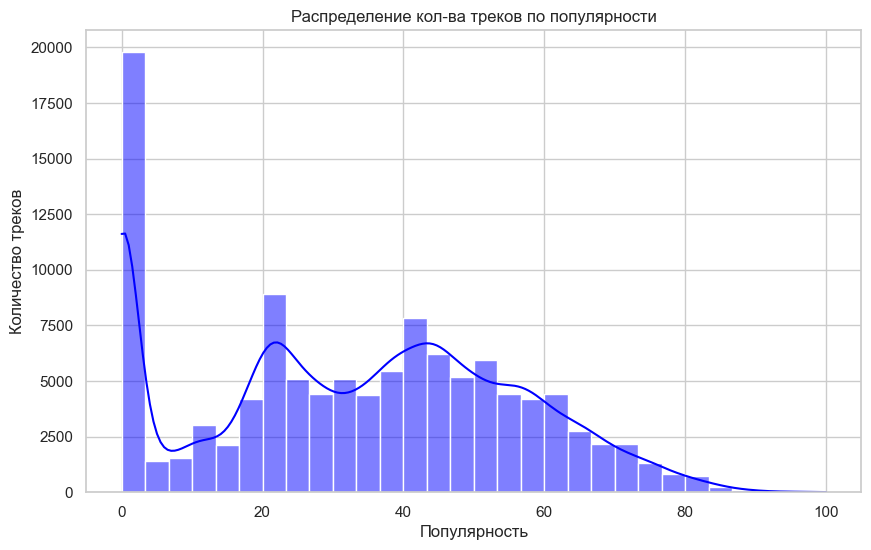

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True, color='blue')
plt.title("Распределение кол-ва треков по популярности")
plt.xlabel("Популярность")
plt.ylabel("Количество треков")
plt.show()

Из этого графика делаем вывод, что так же, как и везде, лишь малая чась треков пользуются в популярности, в то время, как большинство других не замечают

2) Часто песни включают во время танцев, помогает ли этот факт, песням с повышенной "танцевальностью" занимать более высокие места в общем рейтинге популярности?

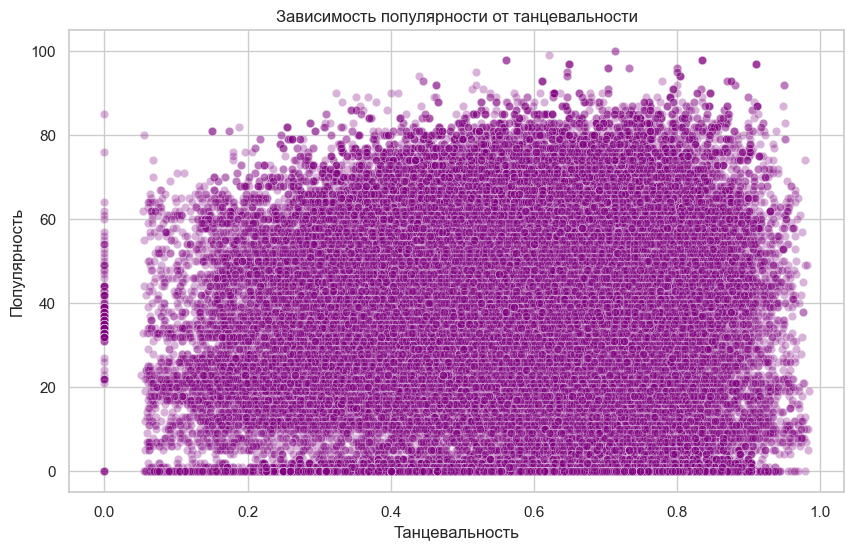

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability', y='popularity', alpha=0.3, color='purple')
plt.title("Зависимость популярности от танцевальности")
plt.xlabel("Танцевальность")
plt.ylabel("Популярность") # 
plt.show()

Вывод: Можно увидеть накую параллель с танцевальностью треков. Чем больше танцевальности в них, тем чаще эти треки попадают в топы

В танцах так же важен темп песни, ведь чем он быстрее, сильнее людям нравится под них танцевать, так что давайте сравниваем, зависит ли популярность треков от их темпа

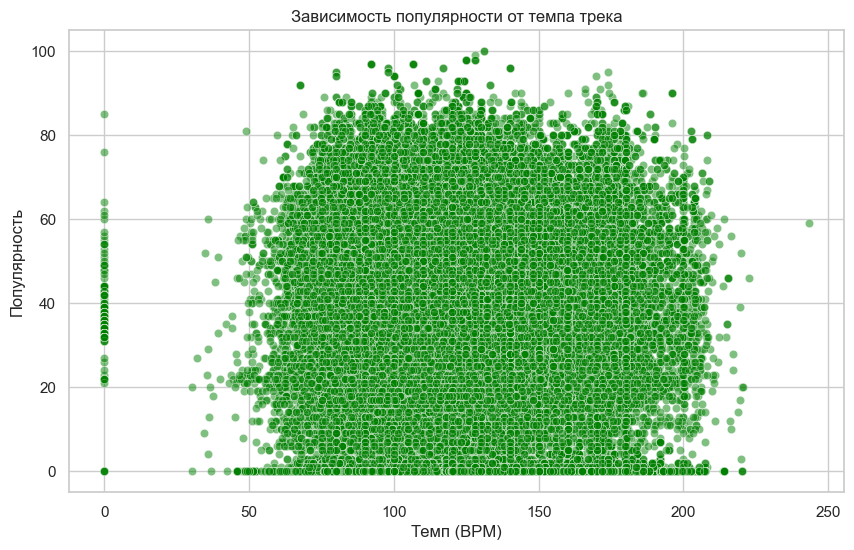

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tempo', y='popularity', alpha=0.5, color='green')
plt.title("Зависимость популярности от темпа трека")
plt.xlabel("Темп (BPM)")
plt.ylabel("Популярность")
plt.show()

В большинстве своём темп трека никак не влияет на его популярность, бывают единичные исключения, но в общей массе популярность зависит не от этого

Проверим, насколько больше громких треков по отношению к тихим на Spotify

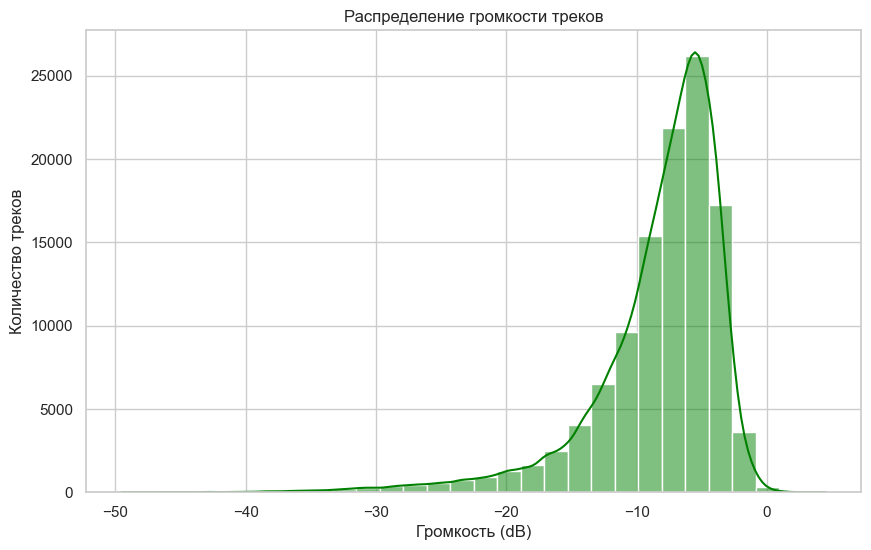

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['loudness'], bins=30, kde=True, color="green")
plt.title("Распределение громкости треков")
plt.xlabel("Громкость (dB)")
plt.ylabel("Количество треков")
plt.show()

Громких треков гораздо больше нежели тихих

Проверям средний темп по разным жанрам

/var/folders/ls/w7f7289x68jczrnbkg0rrj1c0000gn/T/ipykernel_56407/4224175424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_tempo.index, y=genre_tempo.values, palette="muted")


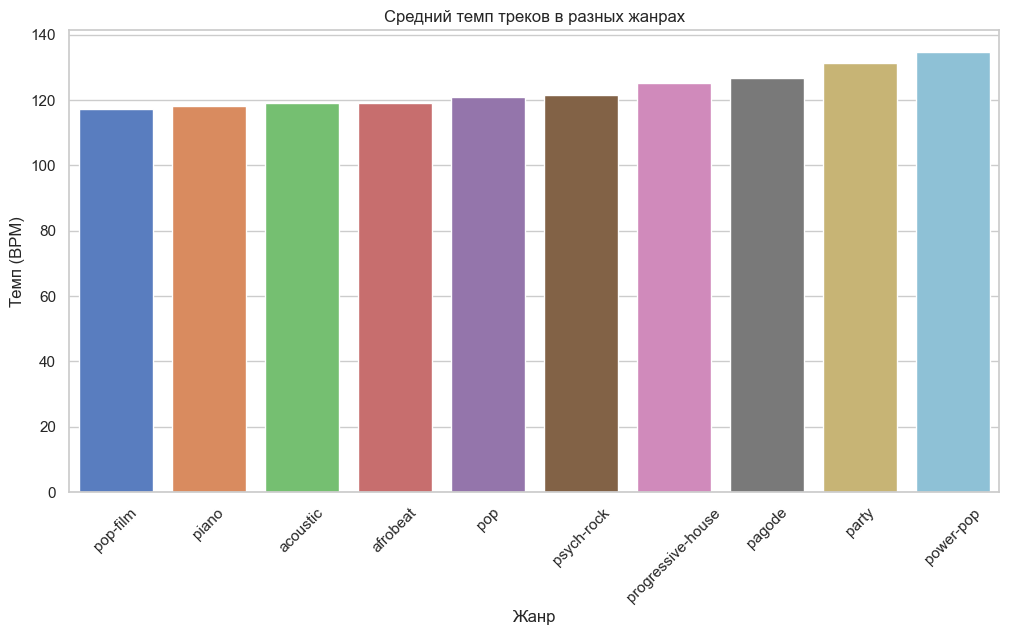

In [20]:
top_genres = df['track_genre'].value_counts().head(10).index
genre_tempo = df[df['track_genre'].isin(top_genres)].groupby('track_genre')['tempo'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_tempo.index, y=genre_tempo.values, palette="muted")
plt.title("Средний темп треков в разных жанрах")
plt.xlabel("Жанр")
plt.ylabel("Темп (BPM)")
plt.xticks(rotation=45)
plt.show()

Вывод: самый высокий темп у power-pop, а самый низкий у pop-film

Топ-10 артистов по средней популярности

/var/folders/ls/w7f7289x68jczrnbkg0rrj1c0000gn/T/ipykernel_56407/2647365028.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="rocket")


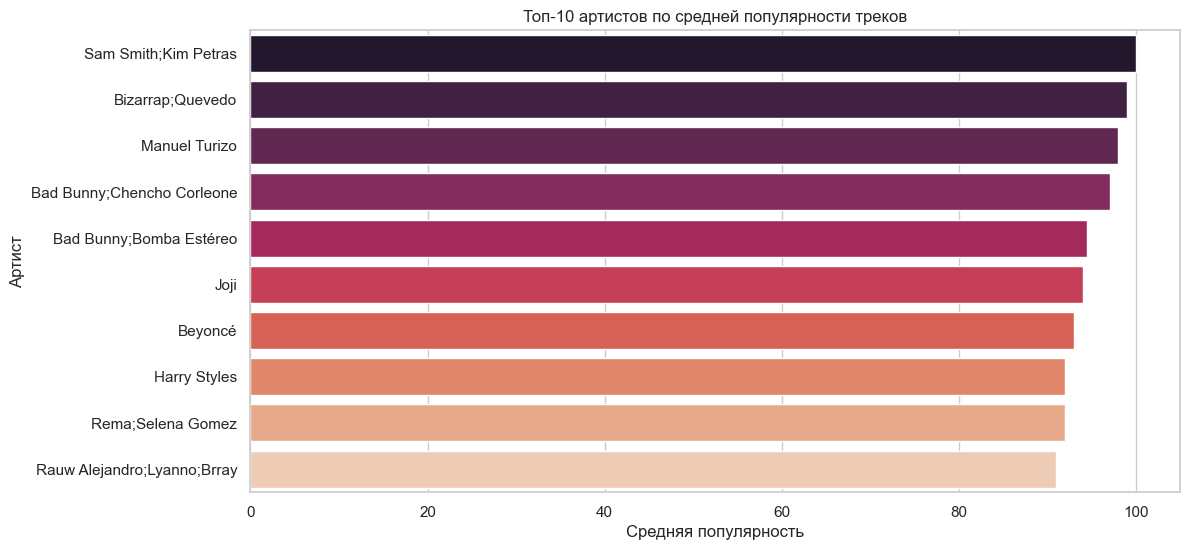

In [21]:
top_artists = df.groupby("artists")['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="rocket")
plt.title("Топ-10 артистов по средней популярности треков")
plt.xlabel("Средняя популярность")
plt.ylabel("Артист")
plt.show()

Вывод: Первое место занял - Sam Smith;Kim Petras

,artists,popularity,count,avg_popularity
0,Quevedo,99,1,99.0
1,Bizarrap,99,1,99.0
2,Harry Styles,276,3,92.0
3,Luar La L,362,4,90.5
4,Beach Weather,90,1,90.0


Посмотрим на соотношение натуральности песен с их кол-вом

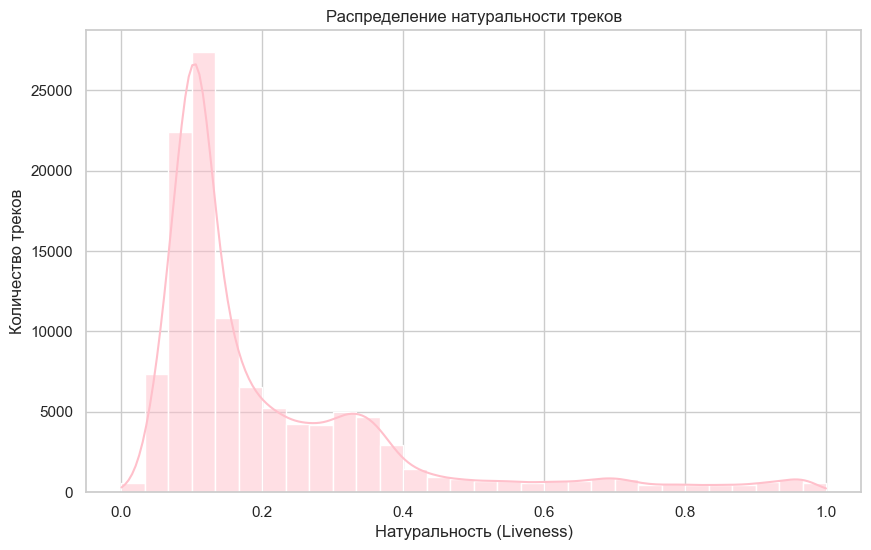

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['liveness'], bins=30, kde=True, color="pink")
plt.title("Распределение натуральности треков")
plt.xlabel("Натуральность (Liveness)")
plt.ylabel("Количество треков")
plt.show()

Вывод: Во всём Spotify в большенстве своём преобладают треки, имеющие меньше 20% натурльности

Проверяем, зависит ли позитивность песни на её популярность

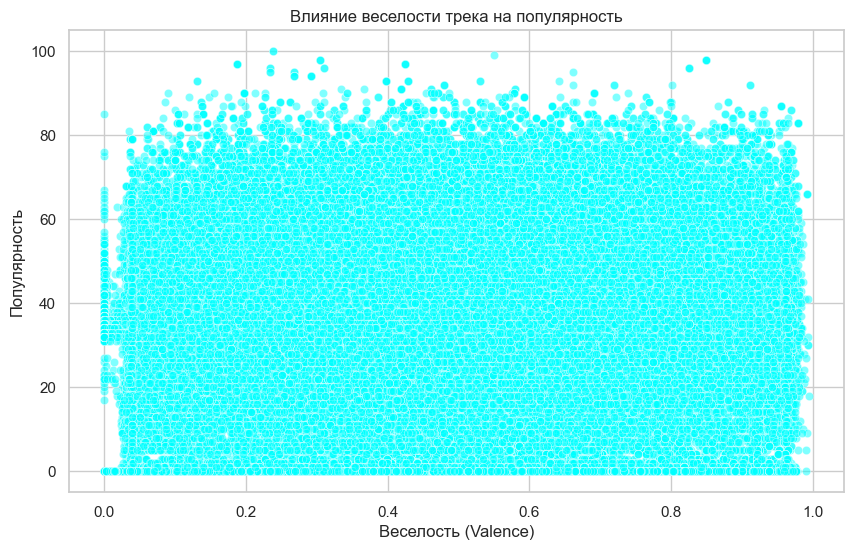

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='valence', y='popularity', color="cyan", alpha=0.5)
plt.title("Влияние веселости трека на популярность")
plt.xlabel("Веселость (Valence)")
plt.ylabel("Популярность")
plt.show()

Популярность песен зависит от исполнителей?

In [31]:
# Копируем начальный датасет
temp_data = copy(df)
# Разделяем артистов
temp_data['artists'] = temp_data['artists'].str.split(';') 

data_exploded = temp_data.explode('artists')

# Находим сумму популярности для каждого артиста
art_pop = data_exploded.groupby('artists')['popularity'].sum().reset_index()
# Находим количество треков у каждого артиста.
art_count = data_exploded['artists'].value_counts().reset_index()
# Формируем итоговый датасет.
art_pop_count = pd.merge(art_pop, art_count, on='artists')
art_pop_count['avg_popularity'] = art_pop_count['popularity'] /  art_pop_count['count']
art_pop_count = art_pop_count.sort_values('avg_popularity', ascending=False).reset_index(drop=True)

art_pop_count.head()

,artists,popularity,count,avg_popularity
0,Quevedo,99,1,99.0
1,Bizarrap,99,1,99.0
2,Harry Styles,276,3,92.0
3,Luar La L,362,4,90.5
4,Beach Weather,90,1,90.0


Вывод: Так же как и с 'танцевальностью' популярность песни не зависит от жанра

# 3.3 Корреляционная матрица

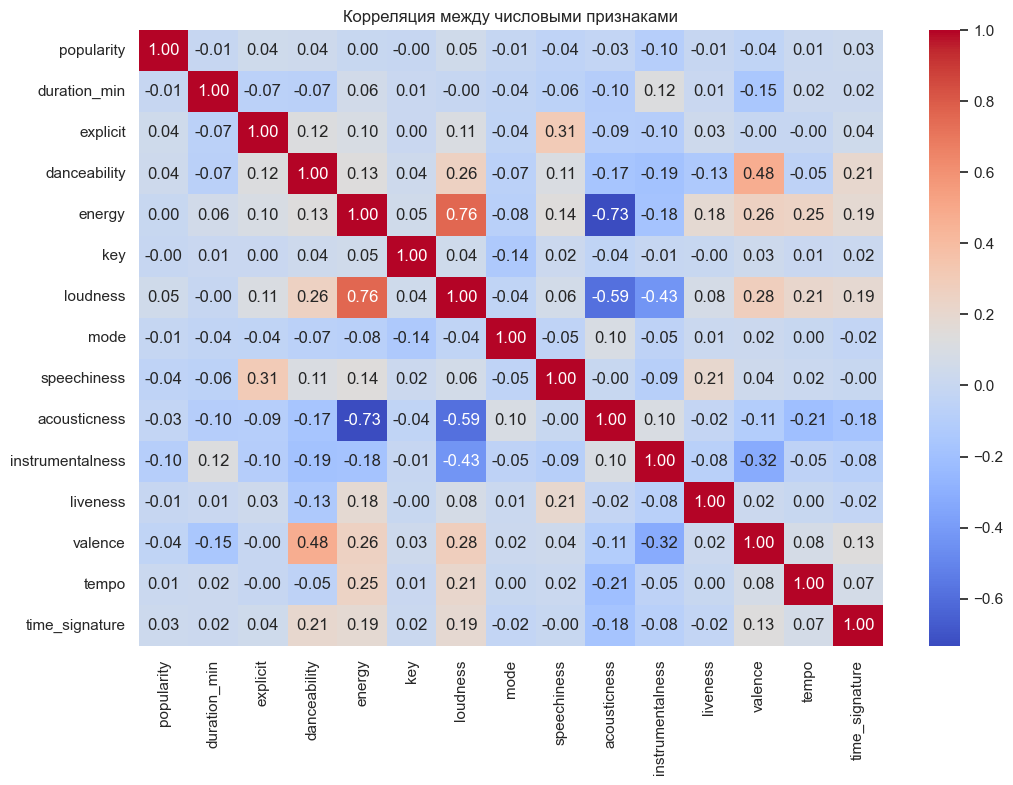

In [24]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)  # Вычисляем корреляцию для числовых данных
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция между числовыми признаками")
plt.show()

Результаты анализа матрицы корреляции:
1. valence и instrumentalness:  
    Это говорит о том, что чем приятнее слушать музыку, тем в ней качественнее инструменты.

2. instrumentalness и loudness:  
    Это говорит о том, что чем тише музыка, тем более качественные в ней инструменты.

3. acousticness и energy:  
    Корреляция этих двух признаков говорит о том, что чем музыка качественнее звучит, тем она менее энергична.

4. valence и danceability:  
    Эта корреляция говорит о том, что чем приятнее слушать музыку, тем более "танцевальная" она.

5. speechiness и explicit:  
    Эта корреляция значит, что наличие нецензурной брани в тексте связано с качеством текста. То есть если текст является качественным, то в нём с большей долей вероятности будут нецензурные выражения.

6. loudness и energy:  
    Эта корреляция значит, что энергичность музыки напрямую зависит от её громкости: чем музыка громче, тем она энергичнее.

7. acousticness и loudness:  
    Это говорит о том, что чем тише музыка, тем более качественный в ней звук.

# 4. Создание признаков

Объединим в одну колонку такие понятия, как "energy" и "danceability"

In [26]:
df['energy_to_dance_ratio'] = df['energy'] / (df['danceability'] + 1e-5)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,energy_to_dance_ratio
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,0,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0.681943
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,0,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0.395229
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,0,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0.819616
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,0,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0.224052
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,0,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0.716817


Зависимость популярности от исполнителя

In [32]:
art_pop_count

,artists,popularity,count,avg_popularity
0,Quevedo,99,1,99.0
1,Bizarrap,99,1,99.0
2,Harry Styles,276,3,92.0
3,Luar La L,362,4,90.5
4,Beach Weather,90,1,90.0
...,...,...,...,...
29854,Julie Thompson,0,1,0.0
29855,Scabtik,0,2,0.0
29856,Trombone Shorty,0,2,0.0
29857,Junichi Hirokami,0,1,0.0


Колонки `popularity` и `count` нам не нужны

In [33]:
art_pop_count = art_pop_count.drop(columns=['popularity', 'count'])
art_pop_count

,artists,avg_popularity
0,Quevedo,99.0
1,Bizarrap,99.0
2,Harry Styles,92.0
3,Luar La L,90.5
4,Beach Weather,90.0
...,...,...
29854,Julie Thompson,0.0
29855,Scabtik,0.0
29856,Trombone Shorty,0.0
29857,Junichi Hirokami,0.0


Каким образом мы добавим признак? По следующим шагам:
1. Преобразуем `art_pop_count` в словарь, где `artists` - ключи, `avg_popularity` - значения.
2. Создадим функцию `calculate_average_popularity`, которая будет считать суммарную популярность артистов у трека.
3. На выход будем подавать отношение суммы популярностей артистов и количества артистов. Таким образом мы получим среднюю популярность артистов у трека.
4. Применим эту фукнцию для всех элементов столбца `artists` и создадим новый признак, который будет иметь название `avg_art_popularity`.

In [34]:
artist_popularity = dict(zip(art_pop_count['artists'], art_pop_count['avg_popularity']))

def calculate_average_popularity(track_artists: list) -> float:
    total_popularity = sum(artist_popularity.get(artist.strip(), 0) for artist in track_artists.split(';'))
    return total_popularity / len(track_artists.split(';'))

df['avg_art_popularity'] = df['artists'].apply(calculate_average_popularity)

In [37]:
df['tempo_bin'] = pd.cut(df['tempo'], bins=[0, 90, 130, 300], labels=['low', 'medium', 'high']) # даём категорию темпа треков
df['speechiness_bin'] = df['speechiness'].apply(lambda x: 'high' if x > 0.33 else 'low') # качество уровня "речевости"

Итогавая таблица:

In [38]:
df

,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,energy_to_dance_ratio,avg_art_popularity,tempo_bin,speechiness_bin
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,0,0.676,0.4610,1,...,0.000001,0.3580,0.7150,87.917,4,acoustic,0.681943,58.000000,low,low
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,0,0.420,0.1660,1,...,0.000006,0.1010,0.2670,77.489,4,acoustic,0.395229,42.923077,low,low
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,0,0.438,0.3590,0,...,0.000000,0.1170,0.1200,76.332,4,acoustic,0.819616,57.875000,low,low
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,0,0.266,0.0596,0,...,0.000071,0.1320,0.1430,181.740,3,acoustic,0.224052,51.090909,high,low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,0,0.618,0.4430,2,...,0.000000,0.0829,0.1670,119.949,4,acoustic,0.716817,42.916667,medium,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,6.4,0,0.172,0.2350,5,...,0.928000,0.0863,0.0339,125.995,5,world-music,1.366200,23.500000,medium,low
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,6.4,0,0.174,0.1170,0,...,0.976000,0.1050,0.0350,85.239,4,world-music,0.672375,23.500000,low,low
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,4.5,0,0.629,0.3290,0,...,0.000000,0.0839,0.7430,132.378,4,world-music,0.523044,26.312500,high,low
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,4.7,0,0.587,0.5060,7,...,0.000000,0.2700,0.4130,135.960,4,world-music,0.861996,32.289474,high,low


# Корреляция новых колонок с популярностью:

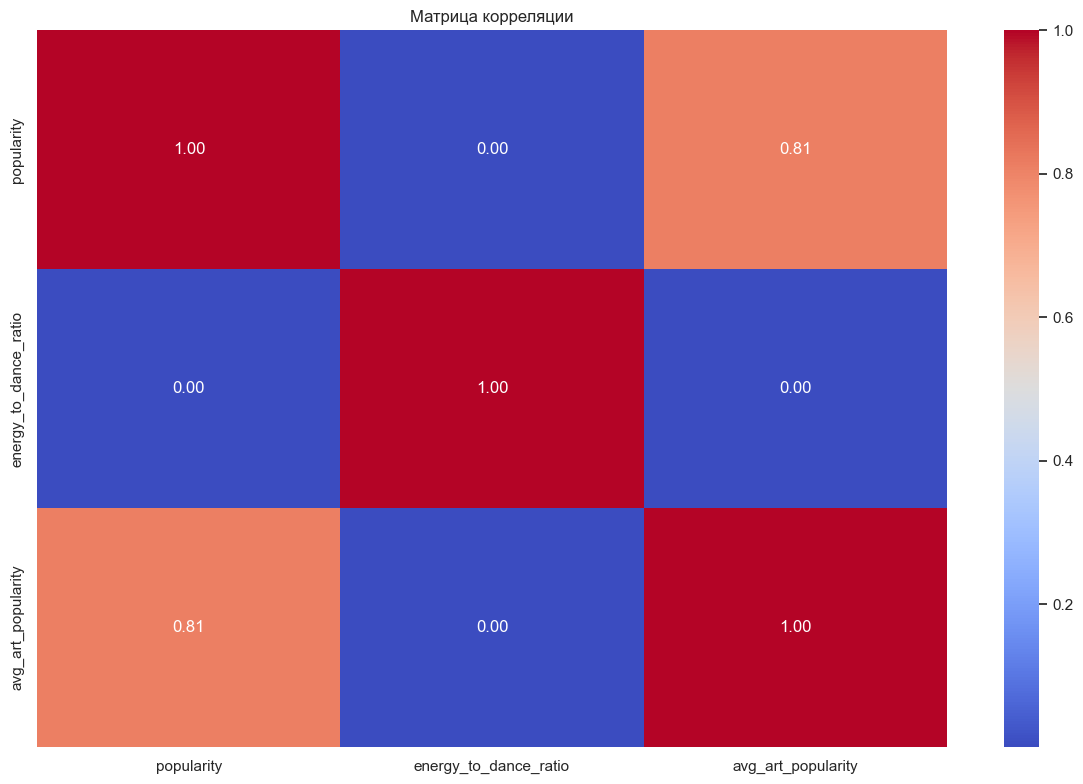

In [36]:
# Датафрейм с новыми строчками и таргетом.
corr_data = df.loc[:, ['popularity', 'energy_to_dance_ratio', 'avg_art_popularity']]

# Построение тепловой карты корреляции
corr_data_1 = corr_data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data=corr_data_1, fmt='.2f', annot=True, cmap='coolwarm', ax=ax)

plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

# 5 Подготовка данных для модели 

Категориальные признаки преобразуются в числовые с помощью "pd.get_dumies"

In [40]:
df_encoded = pd.get_dummies(df[['danceability', 'energy', 'tempo_bin', 'loudness', 
                                'speechiness_bin', 'energy_to_dance_ratio', 'popularity']], drop_first=True)

X = df_encoded.drop(columns=['popularity'])
y = df_encoded['popularity']

Создание простой модели

In [41]:
models = {
    'Линейная регрессия': LinearRegression(),
    'Дерево решений': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Нейронная сеть': Sequential([
        Input(shape=(X.shape[1],)),  # Используем Input для указания размера входных данных
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Выходной слой
    ])
}

# Компиляция нейронной сети
models['Нейронная сеть'].compile(loss='mean_squared_error', optimizer='adam')

5.1 Обучение и тестирование модели, их сравнение

Обучение модели: Линейная регрессия
Линейная регрессия - RMSE: 22.201180546358746, MAE: 18.704351967941417, R²: 0.00644451456976558


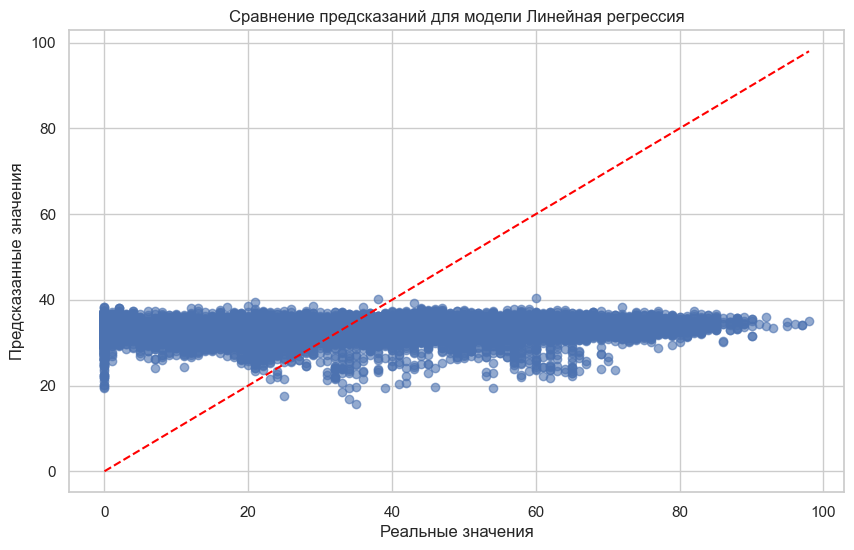

Обучение модели: Дерево решений
Дерево решений - RMSE: 21.664009472769877, MAE: 13.977282032398803, R²: 0.05394221906629648


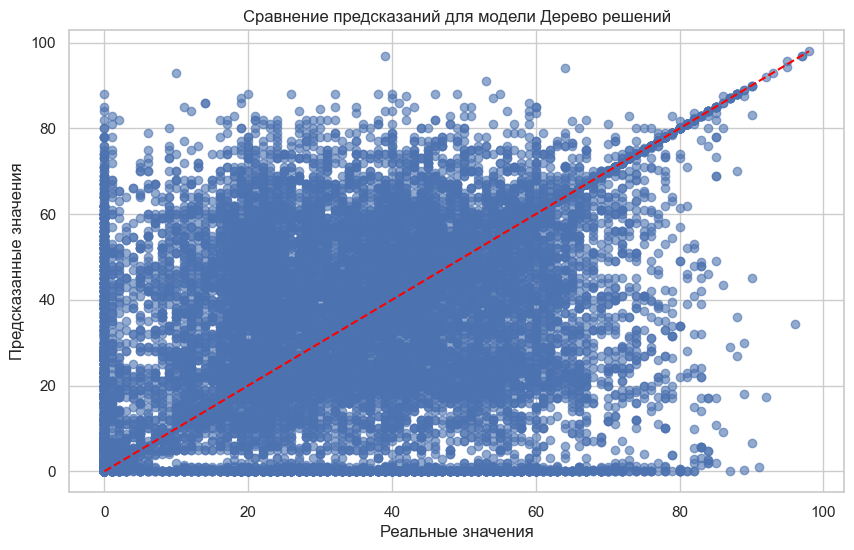

Обучение модели: XGBoost
XGBoost - RMSE: 20.411532368885286, MAE: 16.78266123360709, R²: 0.16017034041561518


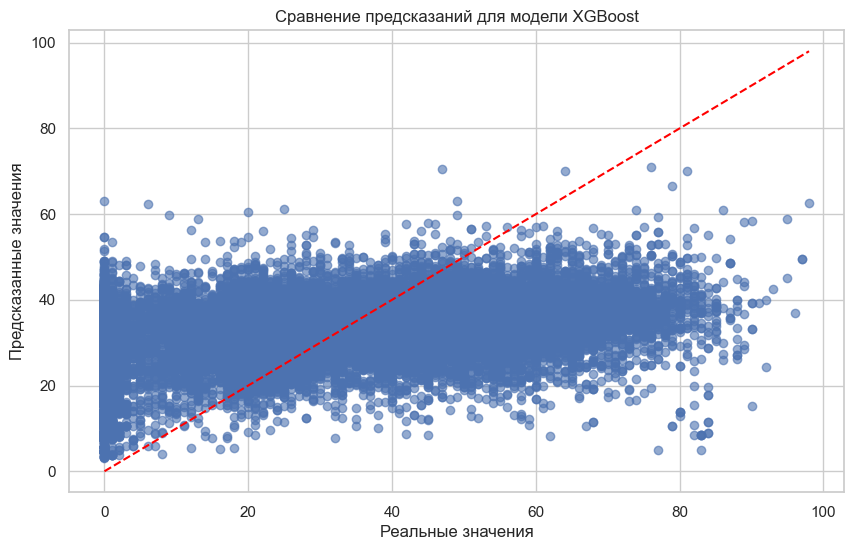

Обучение модели: Нейронная сеть
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
Нейронная сеть - RMSE: 21.76160814754328, MAE: 18.06579171025962, R²: 0.045398835347373545


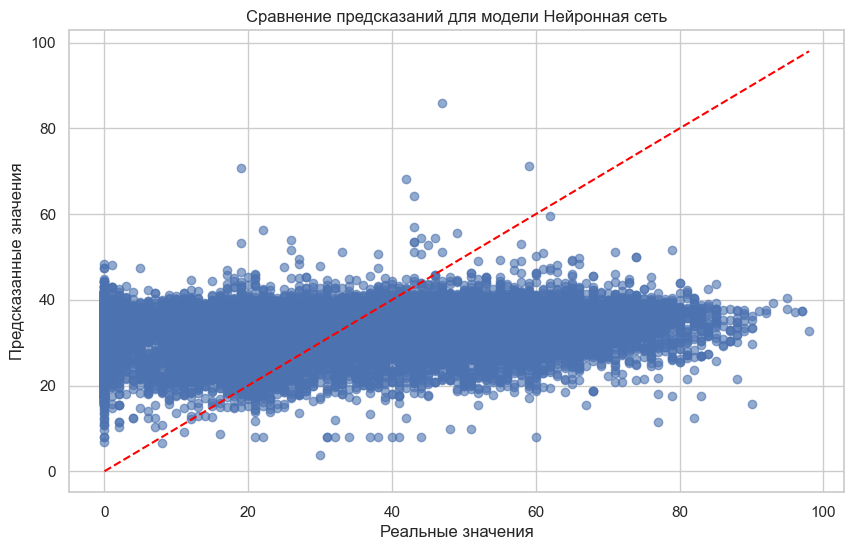

In [52]:
# Разделение данных на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Словарь для хранения оценок
results = {}

# Проверка каждой модели
for name, model in models.items():
    print(f"Обучение модели: {name}")
    
    if name == 'Нейронная сеть':
        # Обучение нейронной сети
        model.fit(X_train, y_train, epochs=50, verbose=0, batch_size=32)
        y_pred = model.predict(X_test)
    else:
        # Обучение остальных моделей
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Оценка метрик
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}

    # Печать метрик
    print(f"{name} - RMSE: {rmse}, MAE: {mae}, R²: {r2}")

    # Визуализация предсказаний
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel("Реальные значения")
    plt.ylabel("Предсказанные значения")
    plt.title(f"Сравнение предсказаний для модели {name}")
    plt.show()


Обработка нейронной сети

Выводим результаты моделей и определяем лучшую

In [51]:
# Итоговый вывод
print("\nРезультаты для всех моделей:")
for name, metrics in results.items():
    print(f"{name}: RMSE={metrics['RMSE']}, MAE={metrics['MAE']}, R²={metrics['R²']}")

# Лучшая модель на основе RMSE
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f"\nЛучшая модель: {best_model} с RMSE={results[best_model]['RMSE']}")


Результаты для всех моделей:
Линейная регрессия: RMSE=22.201180546358746, MAE=18.704351967941417, R²=0.00644451456976558
Дерево решений: RMSE=21.664009472769877, MAE=13.977282032398803, R²=0.05394221906629648
XGBoost: RMSE=20.411532368885286, MAE=16.78266123360709, R²=0.16017034041561518
Нейронная сеть: RMSE=21.792670629467857, MAE=18.063878861352016, R²=0.04267169826920503

Лучшая модель: XGBoost с RMSE=20.411532368885286
